# COGS 118A - Project Checkpoint

# Exploring Models and Methods: Predictions of Client Bank Term Deposit Subscription Likelihood

# Names

- Brooks (Ruijia) Niu
- Hannah Lin
- Xiaofei Teng
- Jiaying Yang

# Abstract 

Our goal is to utilize our dataset Bank Marketing, from the UCI Machine Learning Repository<a name="dataset"></a>[<sup>[1]</sup>](#ucidatanote), to predict whether a given client will subscribe to a term deposit. A term deposit subscription is essentially the depositing of a fixed amount of money into an account for a predetermined length of time. This is typically offered by financial institutions such as banks and credit unions. The dataset consists of 45,211 observations and 17 variables containing client bank data, bank campaigning, and socio-economic context. We will use the data to create a classification model to predict whether an individual, given the characteristics, is likely to subscribe to a term deposit. The model will be evaluated by accuracy and a confusion matrix/ROC Curve. An accurate model can be deemed useful by bank telemarketing campaigners to determine which clients should be targeted in their advertisements for term deposit subscriptions.

# Background

Machine learning techniques have gained more attention recently in a number of businesses, including the banking industry, as a way to forecast client behavior. Predicting whether clients would sign up for a term deposit is one such application that can help banks better target and develop their customer acquisition and retention strategy.

Machine learning algorithms for forecasting term deposit subscriptions have been the subject of numerous studies. In a study by Moro et al. (2014)<a name="moro2014"></a>[<sup>[2]</sup>](#moro2014note), for instance, classification techniques like logistic regression, decision trees, and random forests were used to predict term deposit subscriptions using data from a Portuguese bank's marketing efforts. According to the analysis, random forests had the highest accuracy, coming in at 81%. Though the performance is already impressive, the bank is pursuing even higher accuracy for the profit it could gain.

In order to increase the precision of term deposit subscription prediction models, other studies have concentrated on feature selection and engineering. For instance, Moro et al. (2012)<a name="moro2012"></a>[<sup>[3]</sup>](#moro2012note) demonstrated the potential of how data mining techniques can enhance bank direct marketing. Their study focused on identifying the most effective customer attributes and behaviors for targeted marketing campaigns, and their results showed that data mining could significantly improve campaign effectiveness.

In another study, Nobibon et al. (2011)<a name="nobibon2011"></a>[<sup>[4]</sup>](#nobibon2011note) developed optimization models for targeted offers in direct marketing using both exact and heuristic algorithms. Their models aimed to determine the optimal offers to present to customers based on their purchase histories and demographic characteristics, and their results showed that their models outperformed existing marketing strategies.

Therefore for the banking industry, using machine learning approaches to forecast term deposit subscriptions has produced encouraging results in terms of enhancing the efficiency of marketing efforts and client acquisition and retention tactics. Encouraged by past studies, our team aims to apply machine learning techniques learned from class to classify real bank marketing datasets and analyze the deterministic attributes of clients that will sign up for deposits.

However, our project differs from prior works in terms of the specific techniques and evaluation metrics that we plan to use. For example, while Moro et al. (2014) used logistic regression, decision trees, and random forests for their analysis, we plan to expand our analysis by using K-NN and SVM as well. Additionally, while Moro et al. (2014) used accuracy as their evaluation metric, we plan to use a more comprehensive evaluation strategy that includes the confusion matrix and the AUC-ROC curve.

In terms of feature engineering, we plan to explore similar techniques as Moro et al. (2012) for identifying the most effective customer attributes and behaviors for targeted marketing campaigns. We also plan to investigate other feature engineering techniques such as principal component analysis (PCA) and feature scaling to improve the performance of our models.

Overall, while we drew inspiration from prior works, our project differs in terms of the specific techniques and evaluation metrics we plan to use and the extent to which we will perform feature engineering.

# Problem Statement

In this project, the problem we are trying to solve is that given some personal information of a new client, we try to predict whether he or she is likely to subscribe a term deposit. Given the property of our task, we would like to maximize the recall rate, on the basis that we make good enough prediction overall. To be more specific, we will use K-NN, Decision Tree, SVM, and etc for prediction.

# Data

In this project, we will be using the Bank Marketing Data Set from UCI MAchine Learning Repository. The data is public and can be accessed through the following link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.
This data set recorded information of individual clients and whether each of them has subscribed a term deposit. The following information is from the data set website.

Data Set Information:
	The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


We are using bank-full.csv as our dataset, which has 45,211 instances, each one has the following 17 attributes:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - balance: bank balance (numeric)
- 7 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 8 - loan: has personal loan? (categorical: 'no','yes','unknown')
- 9 - contact: contact communication type (categorical: 'cellular','telephone')
- 10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success', ‘other’)
- 17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Some of the attributes, like age or balance, could possibly be more significant than others, like last contact day or month of the year. 
There are several categorical attributes, which we will apply further transformations such as one-hot encoding before we proceed to the next step. 

For categorical data that includes an “unknown” feature, we plan to introduce soft one-hot encoding that treats “unknown” as a event that has equal probability over the probability space (for example, if there are 3 possible outcomes except for “unknown”, then “unknown” would be coded as 0.33, 0.33, 0.33). 

For numerical data, because the scales across features vary a lot, we plan to normalize the data according to the largest value in specific features, so that all the numerical values are between 0 and 1. For feature 14, pdays, there is an exception for clients that are not previously contacted, and the assigned value for such exception is -1, which has no particular meaning. We plan to code it the same way as the largest possible value under that feature and then normalize it (so that all -1 become 1 after normalization).



# Proposed Solution

In this project, we aim to develop a prediction model for determining whether the client will subscribe to a term deposit in marketing campaigns. Because of the multivariate nature of our dataset (20 inputs with numerical and categorical value) and the binary nature of our prediction task (whether the user will subscribe or not), we will implement K-NN, decision tree, random forest, logistic regression and support vector machine (SVM) and explore other possibilities. We will also use gridsearch to find good hyper parameters. These solutions will be tested with a test dataset separated from the entire dataset and not involved in training. The train-test split ratio is 8:2 since we have a large enough dataset (the test data has 9042 entries) to ensure the robustness of the test dataset.

We will be using cross validation because although we have a large dataset, the models require only a small amount of time to train, which makes cross validation a nice to have for ensuring robustness. Performance will be measured with evaluation metrics in the next section. For coding, we will mainly take advantage of scikit-learn; for example, sklearn.neighbors.KNeighborsClassifier for K-NN,  sklearn.tree.DecisionTreeClassifier for decision tree, sklearn.ensemble.RandomForestClassifier for random forest, sklearn.linear_model.LogisticRegression for logistic regression, sklearn.svm.SVC for support vector machine and sklearn.model_selection.GridSearchCV for grid search and cross validation.

# Evaluation Metrics

For evaluation, we will utilize confusion matrix to intuitively analyze the discrepancy between our models’ predictions and the ground truth. The confusion matrix will be of shape 2x2 and cells containing true positives, false positives, false negatives and true negatives. We will also take advantage of the AUC-ROC curve to make sure our models have good classification threshold. We can then fine tune our models to maximize specificity / precision based on our demand. Another evaluation metric will be prediction accuracy, which is the ratio of correct predictions out of all predictions. All the models will be tested on the same test dataset that is randomly splitted from the shuffled full dataset before training. The size of test data will be 20% of all data and the rest of the data will be used for training. We picked this ratio considering we have sufficient data. Thus, a large test dataset will improve our model’s robustness.


# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



### EDA (Exploratory Data Analysis)

In [23]:
#import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import zero_one_loss, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [24]:
#import and display dataset
bank_data = pd.read_csv("data/bank-full.csv", delimiter= ';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### First we want to see what kind of data we are working with.

In [25]:
bank_data.info()
bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Now we will check how many unique values there are for each variable. This will help us decide which variables need one hot encoding.

In [26]:
print(bank_data.apply(lambda col: col.unique()))

age          [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...
job          [management, technician, entrepreneur, blue-co...
marital                            [married, single, divorced]
education              [tertiary, secondary, unknown, primary]
default                                              [no, yes]
balance      [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...
housing                                              [yes, no]
loan                                                 [no, yes]
contact                         [unknown, cellular, telephone]
day          [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...
month        [may, jun, jul, aug, oct, nov, dec, jan, feb, ...
duration     [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
campaign     [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays        [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...
previous     [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...
poutcome                    [unknown, failure, other, s

#### Next, we will check if there are any missing values within our dataset. If there are missing values, we will take further steps to determine how it will be handled.

In [27]:
# Check number of missing values in dataset
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Afterwards, we check if there are any duplicate values in our dataset. If we have unintentional duplicate values it could lead to bias in the model and overfitting.

In [28]:
# Check if there are duplicate values in dataset
bank_data.duplicated().sum()

0

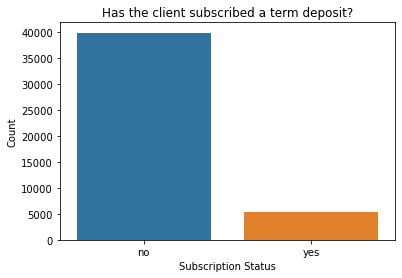

In [29]:
# Visualize the general outcome of target variable
sns.countplot(x='y', data=bank_data).set_title('Has the client subscribed a term deposit?')
plt.xlabel('Subscription Status')
plt.ylabel('Count');

From the graph, we can tell that there are far more client who did not subscribed a term deposit than the population of the client who did. This huge gap between the population will potentially cause imbalance in the future when categorizing data. Therefore we need to be aware of this and some potential solution to it are setting class weight to balance, or take instance of data.

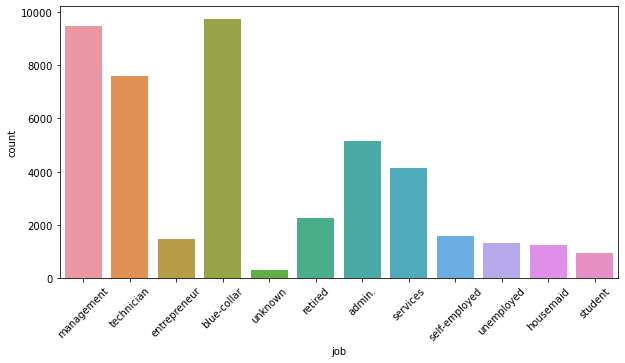

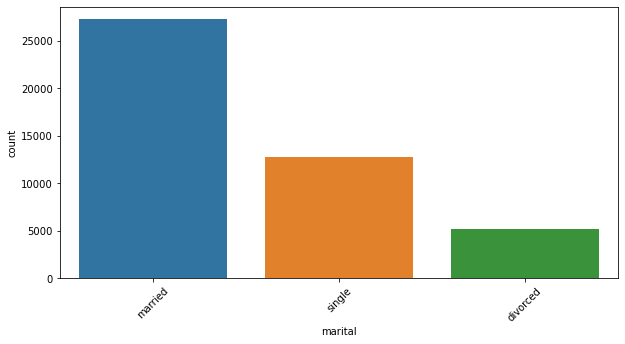

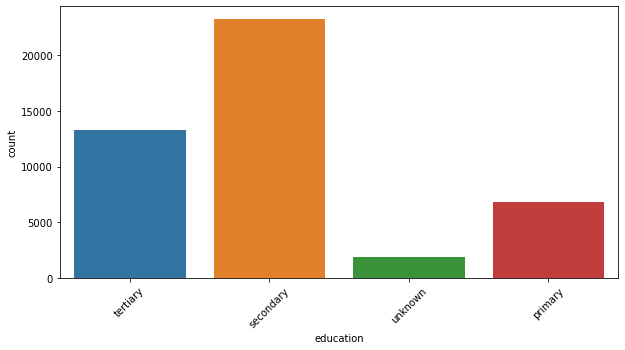

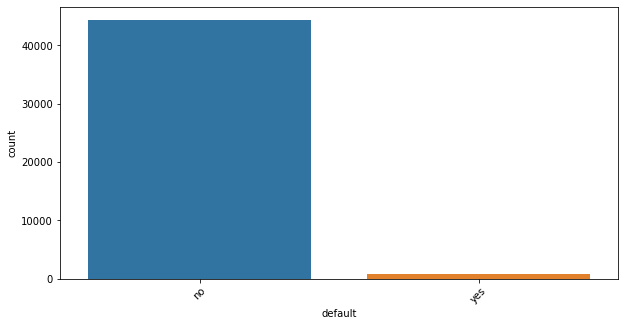

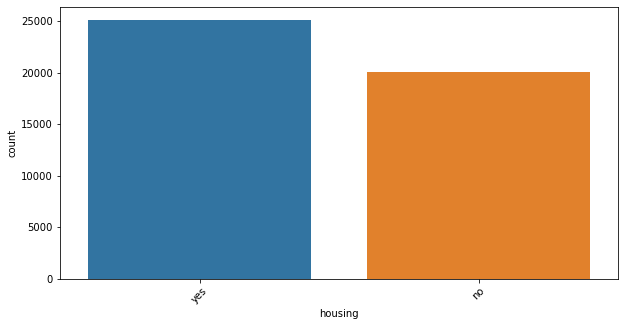

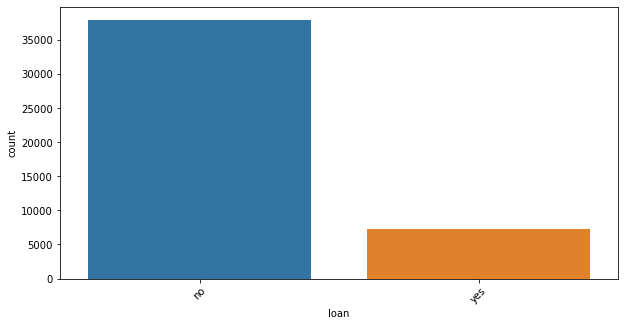

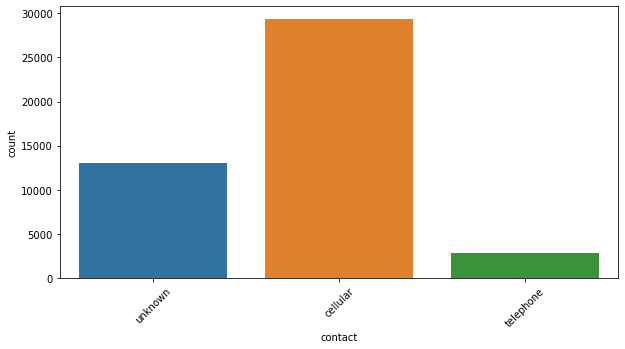

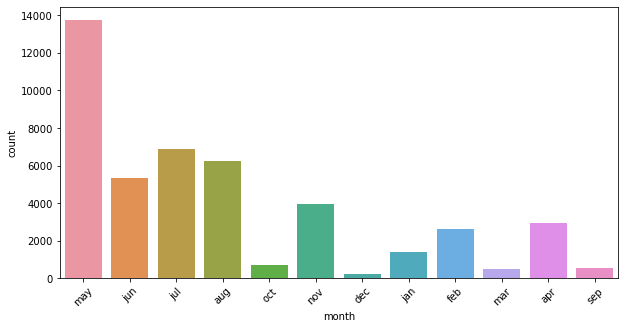

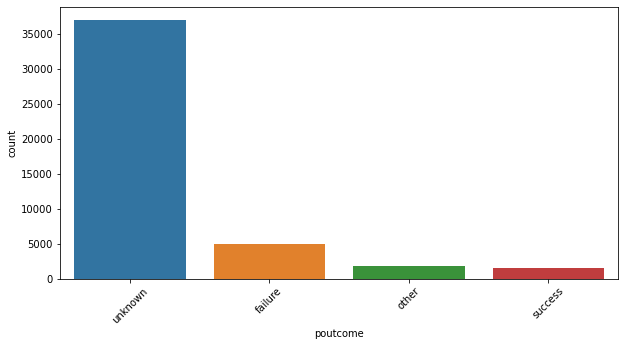

In [30]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature, data=bank_data)
    plt.xticks(rotation=45)
    plt.show()

In this part, we demonstated all the difference in the number of each classification in the above categories. This will help us in the future to better determine what might be the determining feature for client to deposit.

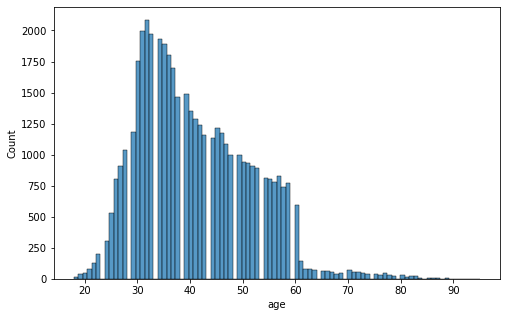

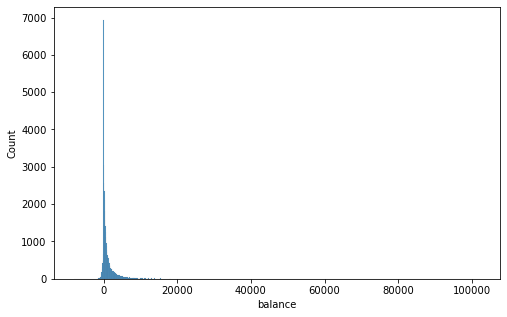

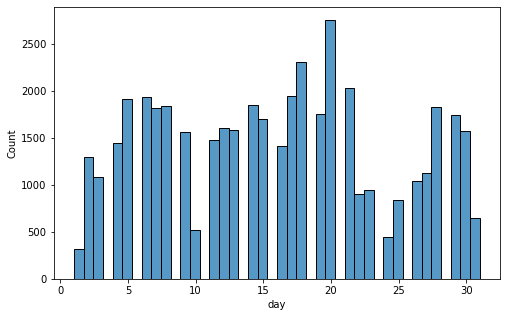

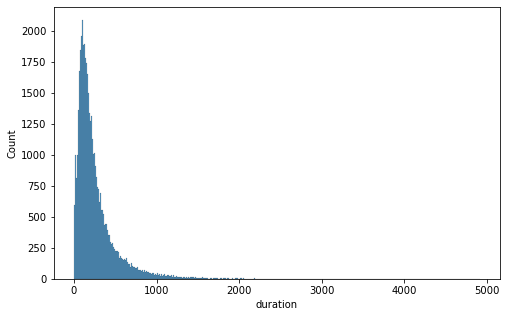

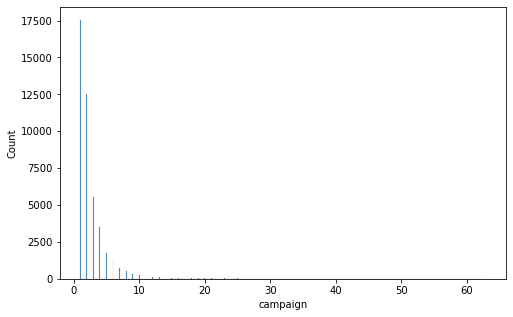

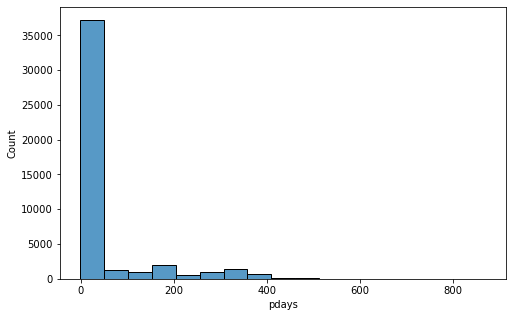

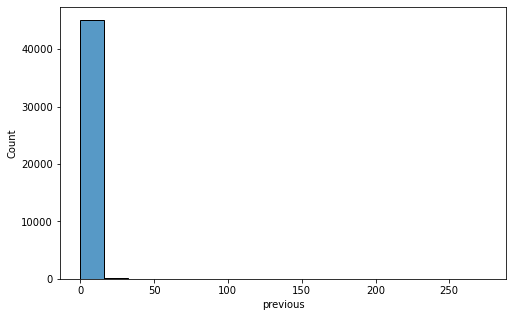

In [31]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.histplot(x=feature, data=bank_data)
    plt.show()

In this section, we used bar chart to visualize the data in each category. By such graphs, it's clear to see the distribution of each category, we are able to predict and target the most typical client that deposit.

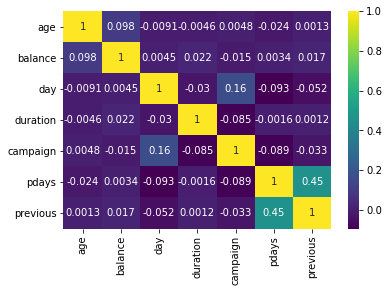

In [22]:
correlation_matrix = bank_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

The heatmap shows the correlation between two variables and by showing such, when two variables are highly correlated, we may have to remove one of the variables. In this heatmap there isn't anything with very high correlation so we do not need to worry about multicolinearity.

### Data Engineering

First, we make a hard copy of the dataset and call it 'bank_data_modified'.

We assign +1 for 'yes' and -1 for 'no' in the 'y' column, and then split the column into a new nparray variable called 'y'.

In [32]:
bank_data_modified = bank_data.copy()
bank_data_modified.loc[bank_data_modified['y']=='yes','y'] = 1
bank_data_modified.loc[bank_data_modified['y']=='no','y'] = -1
bank_data_modified['y'] = bank_data_modified['y'].astype(int)
bank_data_modified

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,-1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,-1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,-1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,-1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,-1


This is what 'y' looks like:

In [33]:
y = bank_data_modified.pop('y')
y

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
45206    1
45207    1
45208    1
45209   -1
45210   -1
Name: y, Length: 45211, dtype: int64

Then, we pre-process the '-1' values in the 'pdays' column as stated in "Data" section above, and apply a normalization, in this case, a MinMaxSacler(), which normalize all values to be between 0 and 1, to all the numerical columns

In [13]:
pdays_max_value = bank_data_modified['pdays'].max()
bank_data_modified.loc[bank_data_modified['pdays']==-1, 'pdays'] = pdays_max_value
num_cols = bank_data_modified.select_dtypes(include='number').columns
scaler = MinMaxScaler()
for col in num_cols:
    bank_data_modified[col] = scaler.fit_transform(bank_data_modified[[col]])
bank_data_modified

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,may,0.053070,0.000000,1.000000,0.000000,unknown
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.000000,1.000000,0.000000,unknown
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,may,0.015453,0.000000,1.000000,0.000000,unknown
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,may,0.018707,0.000000,1.000000,0.000000,unknown
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,may,0.040260,0.000000,1.000000,0.000000,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,technician,married,tertiary,no,0.080293,no,no,cellular,0.533333,nov,0.198658,0.032258,1.000000,0.000000,unknown
45207,0.688312,retired,divorced,primary,no,0.088501,no,no,cellular,0.533333,nov,0.092721,0.016129,1.000000,0.000000,unknown
45208,0.701299,retired,married,secondary,no,0.124689,no,no,cellular,0.533333,nov,0.229158,0.064516,0.210345,0.010909,success
45209,0.506494,blue-collar,married,secondary,no,0.078868,no,no,telephone,0.533333,nov,0.103294,0.048387,1.000000,0.000000,unknown


Then, we apply a one-hot encoding with an exception of 'unknown' values that are coded as a soft one-hot with 1/n across all n dimensions of a feature, as stated in the "Data" section, to all the categorical columns.

In [14]:
cat_cols = bank_data_modified.select_dtypes(include='object').columns
for col in cat_cols:
    one_hot = pd.get_dummies(bank_data[col], prefix=col, )
    mask = (bank_data_modified[col] == 'unknown')
    n = len(bank_data_modified[col].unique()) - 1 #exclude 'unknown'
    one_hot.loc[mask, :] = 1/n
    if (col+'_unknown') in one_hot:
        one_hot.drop((col+'_unknown'), axis=1, inplace=True)
    bank_data_modified = pd.concat([bank_data_modified, one_hot], axis=1)
    bank_data_modified.drop(columns=[col], inplace=True)

Last, we rename the dataframe to be 'X', which is conventional for the learning process.

This is what 'X' looks like:

In [15]:
X = bank_data_modified
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.519481,0.092259,0.133333,0.053070,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
1,0.337662,0.073067,0.133333,0.030704,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
2,0.194805,0.072822,0.133333,0.015453,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
3,0.376623,0.086476,0.133333,0.018707,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
4,0.194805,0.072812,0.133333,0.040260,0.000000,1.000000,0.000000,0.090909,0.090909,0.090909,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.333333,0.333333
45207,0.688312,0.088501,0.533333,0.092721,0.016129,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.333333,0.333333
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.210345,0.010909,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000
45209,0.506494,0.078868,0.533333,0.103294,0.048387,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.333333,0.333333


# Train-Test-Split

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [17]:
# pseudo_randomly split train test data, use 20% data as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-NN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# define the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# prediction
y_pred = knn.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred)

0.885989162888422

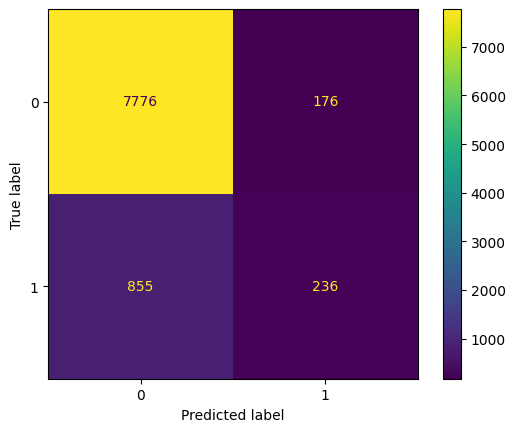

In [20]:
# confusion matrix
knn_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(knn_cm).plot()

In this confusion matrix, we can see the value of 

Area under the Receiver Operating Characteristic curve: 0.75877359712814


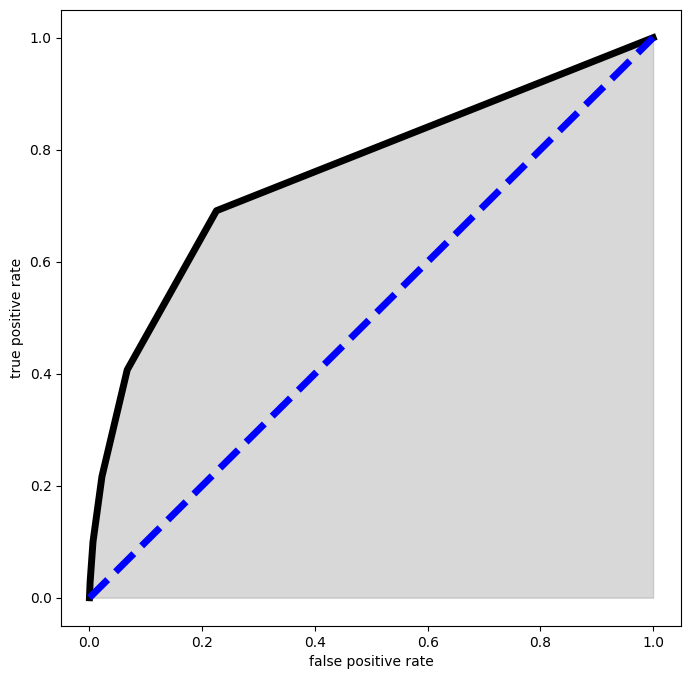

In [21]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fpr, tpr, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
ax.fill_between(fpr, tpr, [0]*len(tpr), color='grey', alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print('Area under the Receiver Operating Characteristic curve:', roc_auc) 

The result is not bad, but we can further improve it with gridsearch!

In [22]:
from sklearn.model_selection import GridSearchCV
# gridsearch with 5-fold cross validation (default cv)
knn_params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_optim = GridSearchCV(KNeighborsClassifier(), knn_params).fit(X_train, y_train)

In [23]:
knn_optim.cv_results_

{'mean_fit_time': array([0.01082034, 0.01088271, 0.01126657, 0.0099153 , 0.01071734,
        0.01115584, 0.01051679, 0.01051607, 0.01107755, 0.01151047,
        0.01115527, 0.01172953, 0.0111443 , 0.01061354, 0.01090436]),
 'std_fit_time': array([0.0005108 , 0.00100193, 0.00044717, 0.00049149, 0.00073112,
        0.00142043, 0.00089507, 0.00063326, 0.00074478, 0.0006268 ,
        0.00062107, 0.0006611 , 0.00047253, 0.00038341, 0.00101572]),
 'mean_score_time': array([0.25451527, 0.2578155 , 0.26076393, 0.26070538, 0.26003489,
        0.26178808, 0.26811376, 0.26636696, 0.26508718, 0.26968203,
        0.26825399, 0.27541785, 0.27364488, 0.28011808, 0.29152555]),
 'std_score_time': array([0.00347692, 0.00383939, 0.00306831, 0.00652816, 0.00472876,
        0.00422854, 0.00538502, 0.00530672, 0.00457001, 0.00287035,
        0.0032375 , 0.00759398, 0.00490032, 0.00553131, 0.02077664]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
             

In [24]:
knn_optim.best_params_

{'n_neighbors': 9}

In [25]:
# define the model
knn = KNeighborsClassifier().set_params(**knn_optim.best_params_)
knn.fit(X_train, y_train)
# prediction
y_pred = knn.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred)

0.8874267389140772

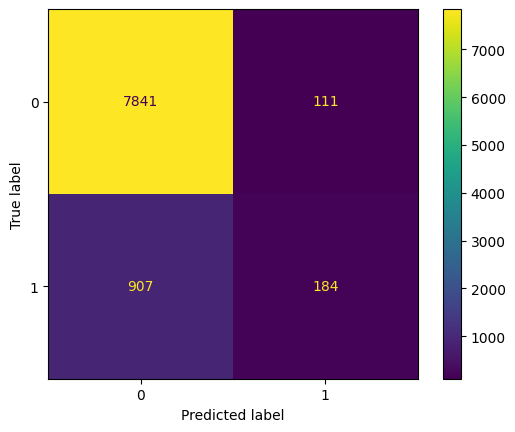

In [26]:
# confusion matrix
knn_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(knn_cm).plot()

Area under the Receiver Operating Characteristic curve: 0.7755035598559274


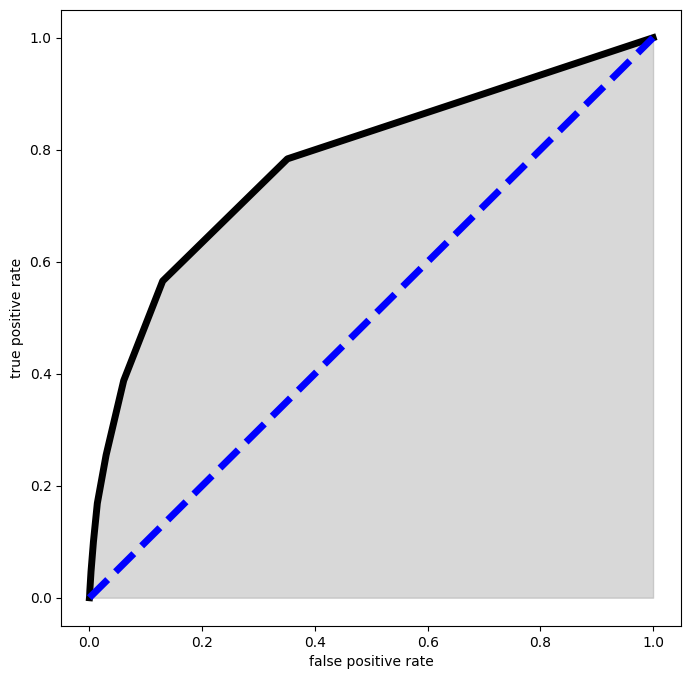

In [27]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fpr, tpr, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
ax.fill_between(fpr, tpr, [0]*len(tpr), color='grey', alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print('Area under the Receiver Operating Characteristic curve:', roc_auc) 

# Decision Tree

In [28]:
from sklearn import tree

In [29]:
# train
decision_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [30]:
# prediction
y_pred_tree = decision_tree.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred_tree)

0.8742673891407718

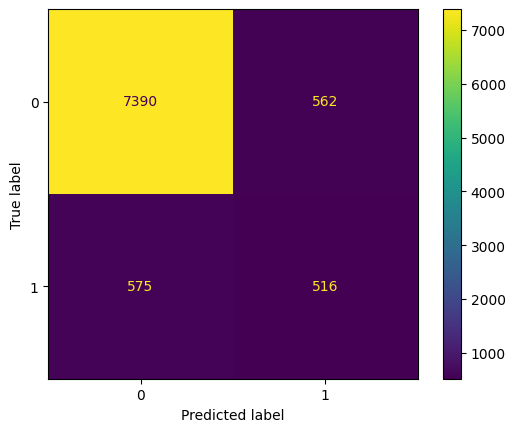

In [31]:
# confusion matrix
tree_cm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(tree_cm).plot()

Area under the Receiver Operating Characteristic curve: 0.7011432711760942


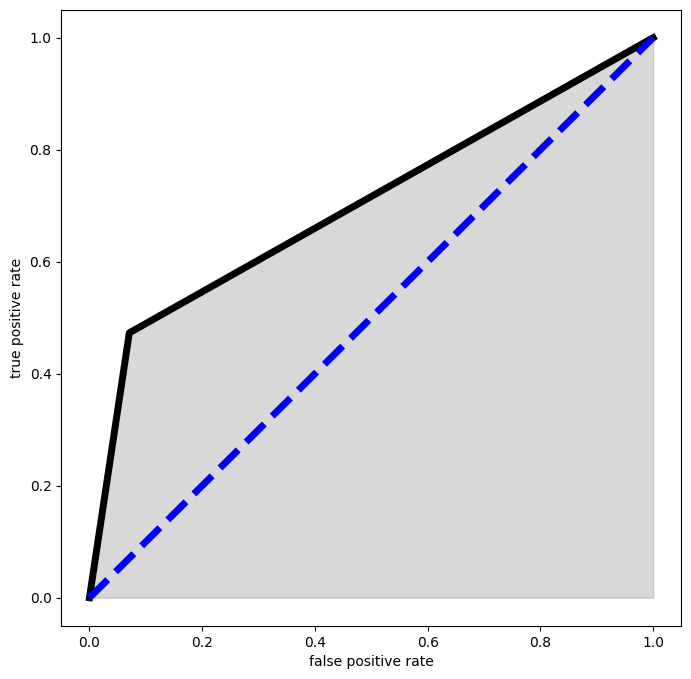

In [32]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fpr, tpr, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
ax.fill_between(fpr, tpr, [0]*len(tpr), color='grey', alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
print('Area under the Receiver Operating Characteristic curve:', roc_auc) 

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [54]:
# define the model
regress = LogisticRegression(C=0.1, random_state=42, penalty="l2", max_iter=1000)
regress.fit(X_train, y_train)
# prediction
y_pred_reg = regress.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred_reg)

0.8950569501271702

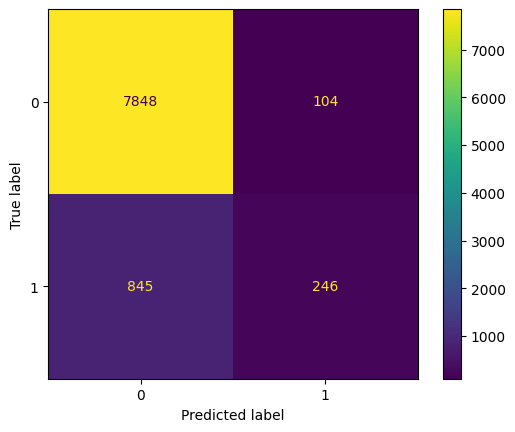

In [55]:
# confusion matrix
regress_cm = confusion_matrix(y_test, y_pred_reg)
ConfusionMatrixDisplay(regress_cm).plot()

Area under the Receiver Operating Characteristic curve: 0.8855949629952029


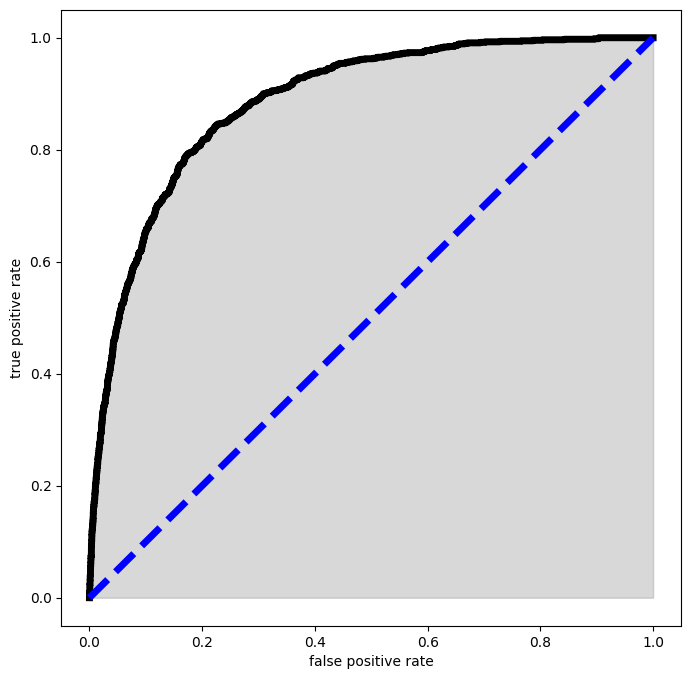

In [56]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, regress.predict_proba(X_test)[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fpr, tpr, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
ax.fill_between(fpr, tpr, [0]*len(tpr), color='grey', alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

roc_auc = roc_auc_score(y_test, regress.predict_proba(X_test)[:, 1])
print('Area under the Receiver Operating Characteristic curve:', roc_auc) 

In [57]:
# gridsearch with 5-fold cross validation (default cv)
reg_params = [{'solver':['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'], 
               'penalty': ['l2'],
               'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
              {'solver':['liblinear', 'saga'], 
               'penalty': ['l1', 'l2'],
               'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
             ]

# increase max_iter to let model converge
reg_optim = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), reg_params).fit(X_train, y_train)

In [58]:
reg_optim.cv_results_

{'mean_fit_time': array([0.02100363, 0.11033473, 0.05500398, 0.13340392, 0.02295389,
        0.10005727, 0.05586557, 0.12281699, 0.0415266 , 0.15684009,
        0.05576377, 0.13117075, 0.08366108, 0.19223633, 0.05648189,
        0.14181533, 0.19269981, 0.2469728 , 0.06275439, 0.2893558 ,
        0.15561156, 0.25891728, 0.06447973, 0.41621833, 0.18033752,
        0.2663547 , 0.06427145, 0.61849813, 0.02551265, 0.03174238,
        0.03015256, 0.19460268, 0.04213729, 0.08796463, 0.03370695,
        0.19313207, 0.04735289, 0.19780726, 0.04745965, 0.18261218,
        0.14051538, 0.1933362 , 0.07191586, 0.17525425, 0.73310409,
        0.34783611, 0.10467911, 0.53539367, 0.45124521, 3.08174634,
        0.12295108, 0.78605704, 0.06822424, 1.5060843 , 0.1299737 ,
        1.16040182]),
 'std_fit_time': array([1.12558451e-03, 1.59016859e-02, 7.14746319e-03, 1.44956176e-02,
        7.30553161e-04, 8.66685378e-03, 6.65716122e-03, 5.16588700e-03,
        2.99281740e-03, 1.16078511e-02, 8.46803207e-0

In [59]:
reg_optim.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [60]:
# define the model
regress = LogisticRegression(random_state=42, max_iter=1000).set_params(**reg_optim.best_params_)
regress.fit(X_train, y_train)
# prediction
y_pred_reg = regress.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred_reg)

0.8994802609753401

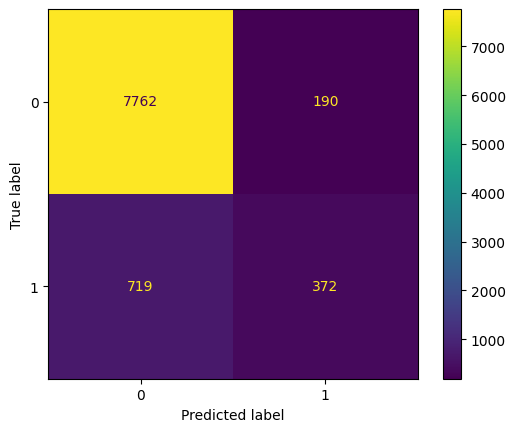

In [61]:
# confusion matrix
regress_cm = confusion_matrix(y_test, y_pred_reg)
ConfusionMatrixDisplay(regress_cm).plot()

Area under the Receiver Operating Characteristic curve: 0.9024233623556187


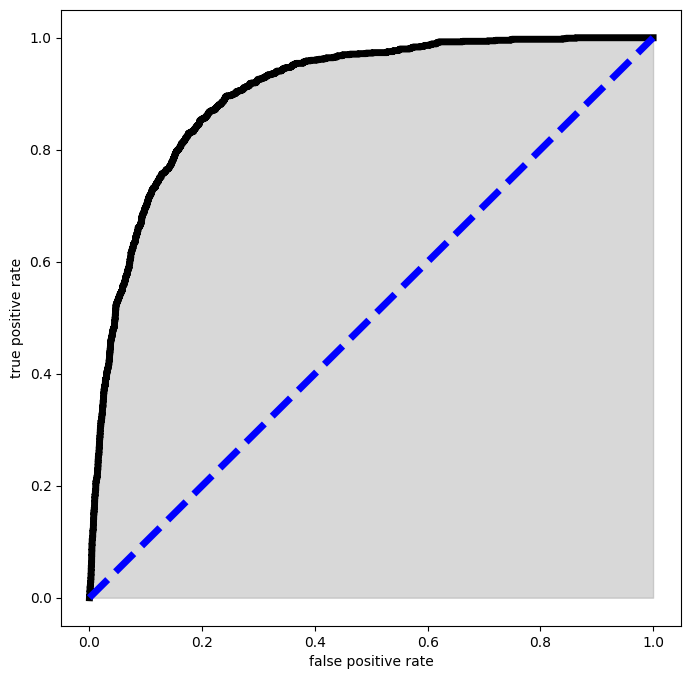

In [62]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, regress.predict_proba(X_test)[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fpr, tpr, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
ax.fill_between(fpr, tpr, [0]*len(tpr), color='grey', alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

roc_auc = roc_auc_score(y_test, regress.predict_proba(X_test)[:, 1])
print('Area under the Receiver Operating Characteristic curve:', roc_auc) 

# SVM

TBD

# Random Forest

TBD

# Ethics & Privacy

We have discovered this data in the University of California, Irvine Machine Learning Repository. The dataset was collected from “A Data-Driven Approach to Predict the Success of Bank Telemarketing” (Moro et al, 2014).

In any machine learning project, it is crucial to take into account potential ethical dilemmas and data privacy concerns. For instance, the usage of personal data prompts concerns about individuals' privacy and the security of their data. Moreover, using some algorithms can lead to biased judgments, which might result in unjust treatment or discrimination against particular groups if the algorithm has determined they are more / less likely to sign up for a deposit. This particular dataset collected by Moro et al. covers more than 45,000 instances and to ensure their privacy, the participants’ names and locations were not collected at the time. At the time of collection, informed consent was given. 

Our team will take measures to address these ethical concerns further to make sure that data is handled ethically. We will also regularly train our model on the best practices to avoid biased machine learning. We will make use of tools like the Ethics Checklist to help us in our endeavors. We seek to build an ethical and efficient machine-learning project by proactively tackling potential ethical problems.

# Team Expectations 

- Show thorough understanding of all aspects of the project and concepts learned in the course; If not, reach out to fellow group members to do so
- All members should be contributing equally across the entire project submission
- Writing well-commented and clear code to wrangle, explore, visualize, analyze, and communicate our findings; Writing the accompanying text throughout the project to explain each section
- Editing the text and code throughout our project for grammar, misspellings, and clarity
- Be punctual to group scheduled meetings
- Effectively communicate to all group members if there is a problem or emergency as soon as possible
- Each member should complete their assigned task by the given deadline
- Be respectful and open-minded while other members are sharing their opinions and feedback



# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/21  |  11 AM |  Get in contact with all group members on WeChat  | Determine the best form of communication; Discuss and decide on the final project topic; Assign sections of Project Proposal to be completed | 
| 2/22  |  Before 11:59 PM |  Complete Project Proposal draft, Visit Office hours for feedback on Project Proposa | Review and make final edits on Project Proposal. Update information to the Jupiter notebook. Submit the Project Proposal. | 
| 2/28  | 11 AM  | N/A  | Import and wrangle data; EDA; Work on model. Assign group members to lead each specific part.  |
| 3/2  | 11 AM  | Finalize wrangling/EDA; Begin programming for project  | Review/Edit wrangling/EDA; Discuss Analysis Plan; Work on the model.  |
| 3/7  | 11 AM  | Edit/Update the Project Checkpoint | Review, discuss, and edit project code. Discuss; Complete Project Checkpoint |
| 3/8  | Before 11:59 PM  | Complete Project Checkpoint draft, Visit Office hours for feedback on Project | Discuss/edit project code; Complete project |
| 3/14  | 11 AM  | Complete analysis; Draft results/conclusion/discussion | Discuss and make edits on Final Project; If there’s extra time implement a neural network model of project and compare with current model.  |
| 3/22  | Before 11:59 PM  | N/A | Turn in Final Project/ Evaluation Survey  |

# Footnotes
<a name="ucidatanote"></a>1.[^](#dataset): Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

<a name="moro2014note"></a>2.[^](#moro2014): [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

<a name="moro2012note"></a>3.[^](#moro2012):Sérgio Moro, Raul Laureano, Paulo Cortez
Enhancing bank direct marketing through data mining
Proceedings of the Forty-First International Conference of the European Marketing Academy, European Marketing Academy (2012), pp. 1-8

<a name="nobibon2011note"></a>4.[^](#nobibon2011):Fabrice Talla Nobibon, Roel Leus, Frits CR Spieksma
Optimization models for targeted offers in direct marketing: exact and heuristic algorithms
European Journal of Operational Research, 210 (3) (2011), pp. 670-683
